In [1]:
import nltk 
import pandas as pd

df = pd.read_csv('review_v1.csv')

df2 = pd.read_csv('movie_v1.csv')

df = df.merge(df2, how='inner', on='movie_id')

df

,movie_id,rating_ind,rating_text,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt11192306,8,I am not a fan of CW superhero tv series since...,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
1,tt11192306,8,I am not a fan of CW superhero tv series since...,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
2,tt11192306,9,Being that this is a Berlanti CW show I was NO...,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
3,tt11192306,9,Being that this is a Berlanti CW show I was NO...,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
4,tt11192306,8,I am not a fan of CW superhero tv series since...,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...
23583,tt0044121,8,"Classic, wonderful sci-fi / horror feature, a ...",The Thing from Another World,7.1,26026.0,Horror Sci-Fi,Horror,Sci-Fi,NaN
23584,tt0044121,9,"In a remote arctic location, a military unit g...",The Thing from Another World,7.1,26026.0,Horror Sci-Fi,Horror,Sci-Fi,NaN
23585,tt0044121,8,There is an inherent tendency to dismiss or di...,The Thing from Another World,7.1,26026.0,Horror Sci-Fi,Horror,Sci-Fi,NaN
23586,tt7737734,3,"Polish filmmaker Malgorzata Szumowska, togethe...",The Other Lamb,5.2,3315.0,Drama Horror,Drama,Horror,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [3]:
fig = px.histogram(df, x="rating_ind")
fig.update_traces(marker_color="Gold",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Movie Review Score')
fig.show()

In [4]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dross\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [6]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords = set(STOPWORDS)

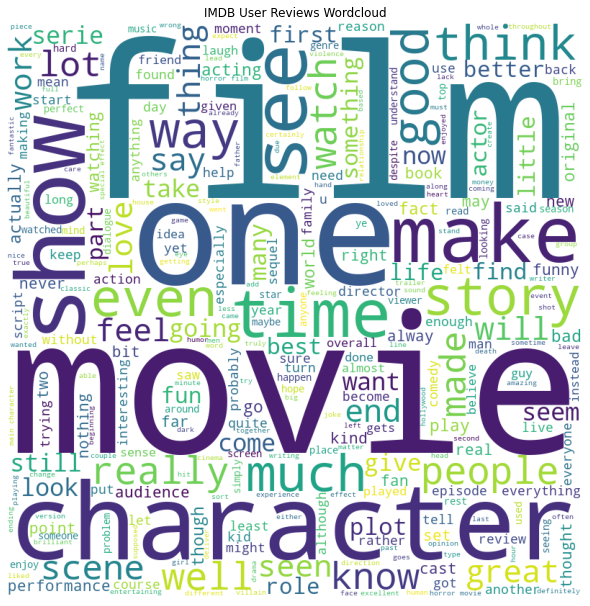

In [12]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
comment_words = ''

# iterate through the csv file 
for val in df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("IMDB User Reviews Wordcloud")
  
plt.show() 

In [36]:
stopwords = list(stopwords)+["show", "movie", "character", "time", "film", "one", "make", "serie", "see", "story", "characters", "watch", "series"]
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path


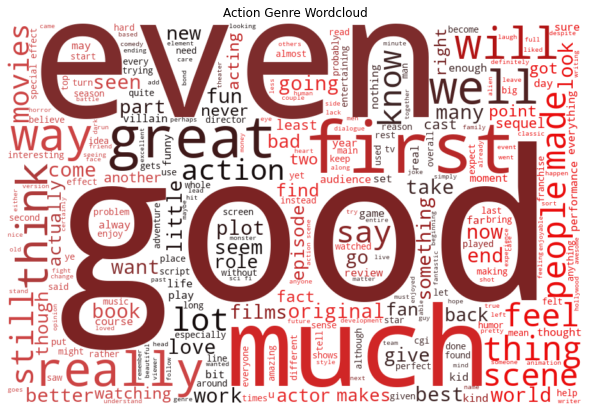

In [42]:
comment_words = ''

def action_df(df):
    result = []
    for index, row in df.iterrows():
        if row['genre1'] == "Adventure" or row['genre2'] == "Adventure" or row['genre3'] == "Adventure":
            result.append(index)
    return result
df_action = df.loc[action_df]

for val in df_action.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
mask = np.array(Image.open("images/action.png"))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10,
                mask=mask).generate(comment_words) 
image_colors = ImageColorGenerator(mask)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Action Genre Wordcloud")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
 
plt.show() 

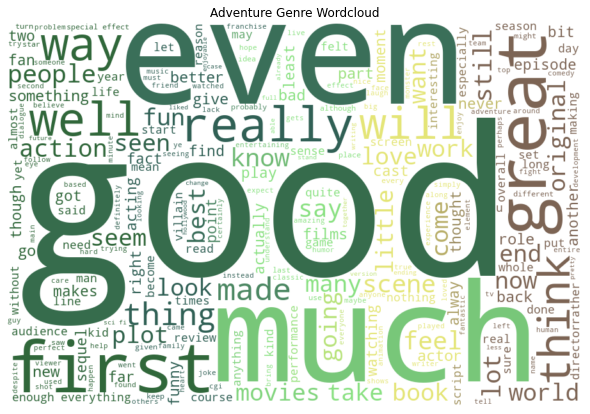

In [38]:
comment_words = ''

def adventure_df(df):
    result = []
    for index, row in df.iterrows():
        if row['genre1'] == "Adventure" or row['genre2'] == "Adventure" or row['genre3'] == "Adventure":
            result.append(index)
    return result
df_adventure = df.loc[adventure_df]

for val in df_adventure.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
  
mask = np.array(Image.open("images/adventure.png"))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10,
                mask=mask).generate(comment_words) 
image_colors = ImageColorGenerator(mask)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Adventure Genre Wordcloud")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.show() 

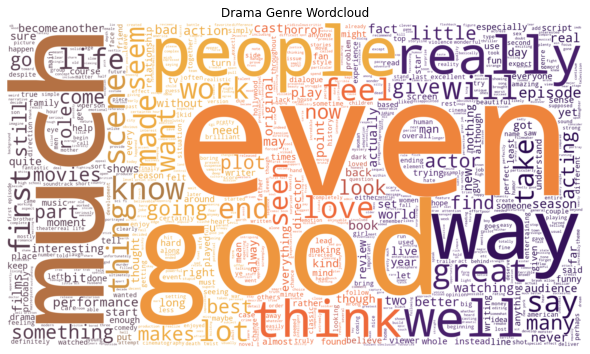

In [39]:
comment_words = ''

def drama_df(df):
    result = []
    for index, row in df.iterrows():
        if row['genre1'] == "Drama" or row['genre2'] == "Drama" or row['genre3'] == "Drama":
            result.append(index)
    return result
df_drama = df.loc[drama_df]

for val in df_drama.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
mask = np.array(Image.open("images/drama.png"))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10,
                mask=mask).generate(comment_words) 
image_colors = ImageColorGenerator(mask)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Drama Genre Wordcloud")  
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.show() 

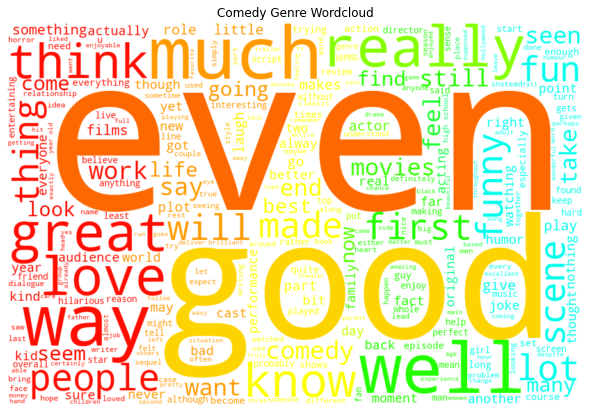

In [43]:
comment_words = ''

def comedy_df(df):
    result = []
    for index, row in df.iterrows():
        if row['genre1'] == "Comedy" or row['genre2'] == "Comedy" or row['genre3'] == "Comedy":
            result.append(index)
    return result
df_comedy = df.loc[comedy_df]

for val in df_comedy.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
mask = np.array(Image.open("images/comedy.png"))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10,
                mask=mask).generate(comment_words) 
image_colors = ImageColorGenerator(mask)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Comedy Genre Wordcloud")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.show() 

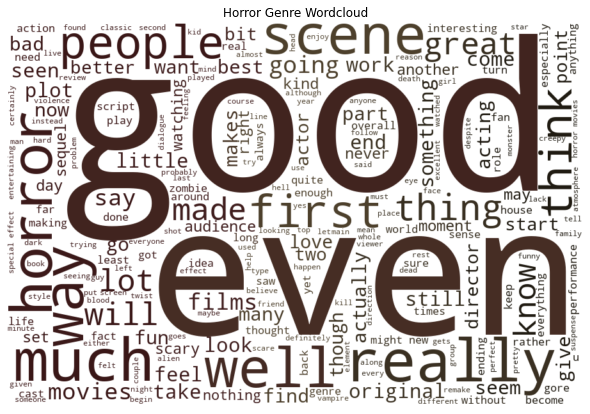

In [41]:
comment_words = ''

def horror_df(df):
    result = []
    for index, row in df.iterrows():
        if row['genre1'] == "Horror" or row['genre2'] == "Horror" or row['genre3'] == "Horror":
            result.append(index)
    return result
df_horror = df.loc[horror_df]

for val in df_horror.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
mask = np.array(Image.open("images/horror.png"))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10,
                mask=mask).generate(comment_words) 
image_colors = ImageColorGenerator(mask)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Horror Genre Wordcloud")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.show() 